# Fundamentals

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from zipline.api import (
    order, record, symbol, attach_pipeline, pipeline_output
)
from zipline import run_algorithm
# from zipline.finance import commission, slippage
import pandas as pd
import matplotlib.pyplot as plt
# from zipline.pipeline import Pipeline
# from zipline.pipeline.factors import RSI
# from zipline.pipeline.data import EquityPricing

<IPython.core.display.Javascript object>

In [3]:
# Pipeline is used for dynamic security selection
def make_pipeline():

    rsi = RSI(window_length=15)
    return Pipeline(columns={'assets': rsi.top(3)})

<IPython.core.display.Javascript object>

In [4]:
def initialize(context):
    """ 
    This is called once at the very begining of the backtest 
    and should be used to set up any state needed by the algorithm.
    """

    # This registers that the pipeline should be computed daily
    #attach_pipeline(make_pipeline(), 'my_pipeline')

    #     context.set_commission(
    #         commission.PerShare(cost=.0075, min_trade_cost=1.0)
    #     )
    #     context.set_slippage(slippage.VolumeShareSlippage())
    pass

<IPython.core.display.Javascript object>

In [9]:
def handle_data(context, data):
    """
    This is called every minute when ``data_frequency == 'minute'`` 
    or every day when ``data_frequency == 'daily'``
    """
    #pipeline_output('my_pipeline')
    order(symbol('AAPL'), 10)
    record(AAPL=data.current(symbol('AAPL'), 'price'))

<IPython.core.display.Javascript object>

In [6]:
def analyze(context, perf):
    """
    This function is called once at the end of the backtest and 
    is passed the context and the performance data.
    """
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
    ax[0].plot(perf.portfolio_value)
    ax[0].set_title('Portfolio Value')
    ax[1].plot(perf.AAPL)
    ax[1].set_title('Price')

<IPython.core.display.Javascript object>

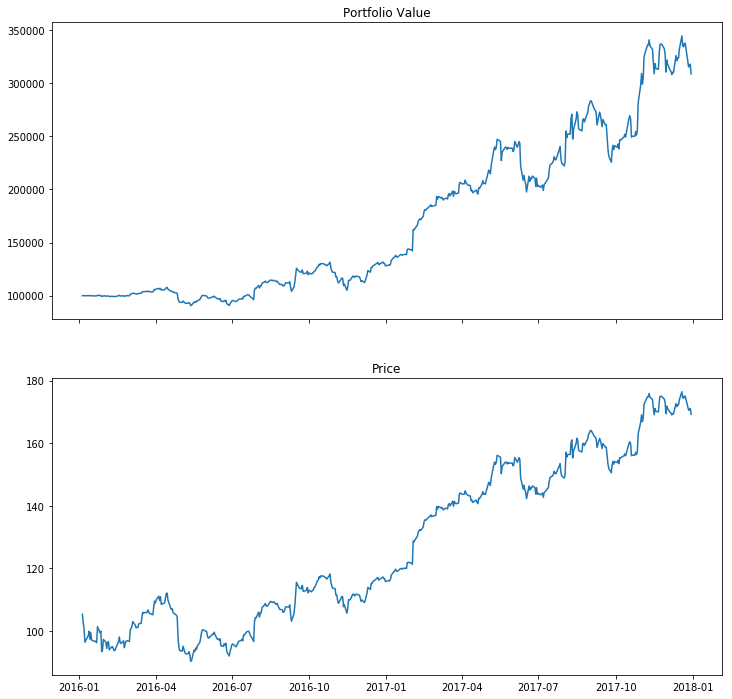

<IPython.core.display.Javascript object>

In [10]:
# Run the backtest
perf = run_algorithm(
    start=pd.Timestamp('2016-01-01', tz='utc'),
    end=pd.Timestamp('2018-01-01', tz='utc'),
    initialize=initialize,
    capital_base=100000,
    handle_data=handle_data,
    analyze=analyze
)